In [1]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 163s 3ms/step - loss: 0.2633 - acc: 0.9184 - val_loss: 0.0562 - val_acc: 0.9818
Epoch 2/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0889 - acc: 0.9741 - val_loss: 0.0414 - val_acc: 0.9865
Epoch 3/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0663 - acc: 0.9801 - val_loss: 0.0329 - val_acc: 0.9888
Epoch 4/12
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0543 - acc: 0.9834 - val_loss: 0.0308 - val_acc: 0.9898
Epoch 5/12
60000/60000 [============

**Building CNN with 3 Layers,Kernel_size=(2,2)**

In [23]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(16, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))#Layer1
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu'))#Layer2
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))#Layer3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 233s 4ms/step - loss: 0.5178 - acc: 0.8349 - val_loss: 0.1022 - val_acc: 0.9716
Epoch 2/12
60000/60000 [==============================] - 232s 4ms/step - loss: 0.2315 - acc: 0.9271 - val_loss: 0.0741 - val_acc: 0.9800
Epoch 3/12
60000/60000 [==============================] - 234s 4ms/step - loss: 0.1806 - acc: 0.9439 - val_loss: 0.0645 - val_acc: 0.9819
Epoch 4/12
60000/60000 [==============================] - 236s 4ms/step - loss: 0.1506 - acc: 0.9535 - val_loss: 0.0755 - val_acc: 0.9801
Epoch 5/12
60000/60000 [==============================] - 234s 4ms/step - loss: 0.1349 - acc: 0.9589 - val_loss: 0.0659 - val_acc: 0.9814
Epoch 6/12
60000/60000 [==============================] - 233s 4ms/step - loss: 0.1188 - acc: 0.9642 - val_loss: 0.0753 - val_acc: 0.9805
Epoch 7/12
60000/60000 [==============================] - 233s 4ms/step - loss: 0.1107 - acc: 0.9659 - val_loss: 0.0435 - 

In [0]:
# Plotting Training and Validation loss plots
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.04160374434412524
Test accuracy: 0.9875


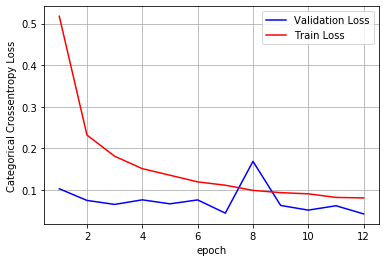

In [24]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Building CNN with 5 Layers,Kernel_size=(5,5)**

In [18]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))#Layer1
model.add(Conv2D(32, (5, 5), activation='relu'))#Layer2
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu'))#Layer3
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Conv2D(64, (5, 5), activation='relu'))#Layer4
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Conv2D(64, (5, 5), activation='relu'))#Layer5
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 622s 10ms/step - loss: 0.8728 - acc: 0.7384 - val_loss: 0.1029 - val_acc: 0.9692
Epoch 2/12
60000/60000 [==============================] - 627s 10ms/step - loss: 0.2020 - acc: 0.9450 - val_loss: 0.0652 - val_acc: 0.9802
Epoch 3/12
60000/60000 [==============================] - 628s 10ms/step - loss: 0.1349 - acc: 0.9655 - val_loss: 0.0585 - val_acc: 0.9833
Epoch 4/12
60000/60000 [==============================] - 624s 10ms/step - loss: 0.1130 - acc: 0.9717 - val_loss: 0.0602 - val_acc: 0.9834
Epoch 5/12
60000/60000 [==============================] - 619s 10ms/step - loss: 0.0932 - acc: 0.9762 - val_loss: 0.0455 - val_acc: 0.9891
Epoch 6/12
60000/60000 [==============================] - 624s 10ms/step - loss: 0.0861 - acc: 0.9782 - val_loss: 0.0463 - val_acc: 0.9874
Epoch 7/12
60000/60000 [==============================] - 621s 10ms/step - loss: 0.0773 - acc: 0.9803 - val_loss: 0.

Test score: 0.034640524526214404
Test accuracy: 0.9909


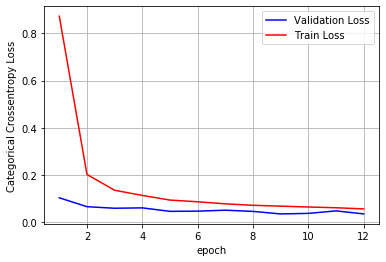

In [19]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Building CNN with 7 Layers,Kernel_size=(3,3)**

In [21]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))#Layer1
model.add(Conv2D(32, (3, 3), activation='relu'))#Layer2
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))#Layer3
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(Conv2D(32, (3, 3), activation='relu'))#Layer4
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(Conv2D(64, (3, 3), activation='relu'))#Layer5
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(Conv2D(64, (3, 3), activation='relu'))#Layer6
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(Conv2D(64, (3, 3), activation='relu'))#Layer7
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 599s 10ms/step - loss: 1.3792 - acc: 0.4873 - val_loss: 0.2144 - val_acc: 0.9435
Epoch 2/12
60000/60000 [==============================] - 599s 10ms/step - loss: 0.6297 - acc: 0.7536 - val_loss: 0.1103 - val_acc: 0.9695
Epoch 3/12
60000/60000 [==============================] - 600s 10ms/step - loss: 0.4296 - acc: 0.8327 - val_loss: 0.0773 - val_acc: 0.9790
Epoch 4/12
60000/60000 [==============================] - 597s 10ms/step - loss: 0.3136 - acc: 0.8882 - val_loss: 0.0525 - val_acc: 0.9859
Epoch 5/12
60000/60000 [==============================] - 596s 10ms/step - loss: 0.2560 - acc: 0.9107 - val_loss: 0.0468 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 599s 10ms/step - loss: 0.1714 - acc: 0.9477 - val_loss: 0.0509 - val_acc: 0.9854
Epoch 7/12
60000/60000 [==============================] - 603s 10ms/step - loss: 0.1229 - acc: 0.9637 - val_loss: 0.

Test score: 0.028824671519921685
Test accuracy: 0.9922


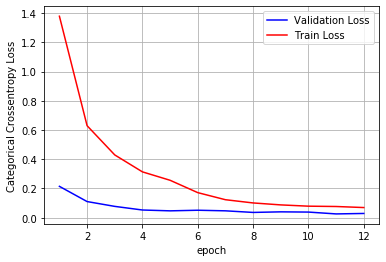

In [22]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


**Conclusions**

In [0]:
from prettytable import PrettyTable

In [0]:
x=PrettyTable()

In [0]:
x.field_names=['Neural_Network_Type','#_of_Layers','Kernel_Size','Optimizer','Activation_Function','Test_Score','Test_Accuracy']

In [0]:
x.add_row(['CNN',3,'(2,2)','adam','relu',0.041,98.75])
x.add_row(['CNN',5,'(5,5)','adam','relu',0.034,99.09])
x.add_row(['CNN',7,'(3,3)','adam','relu',0.028,99.22])

In [41]:
print(x)

+---------------------+-------------+-------------+-----------+---------------------+------------+---------------+
| Neural_Network_Type | #_of_Layers | Kernel_Size | Optimizer | Activation_Function | Test_Score | Test_Accuracy |
+---------------------+-------------+-------------+-----------+---------------------+------------+---------------+
|         CNN         |      3      |    (2,2)    |    adam   |         relu        |   0.041    |     98.75     |
|         CNN         |      5      |    (5,5)    |    adam   |         relu        |   0.034    |     99.09     |
|         CNN         |      7      |    (3,3)    |    adam   |         relu        |   0.028    |     99.22     |
+---------------------+-------------+-------------+-----------+---------------------+------------+---------------+
